In [1]:
#input file name
file = "y-6_Cell Counts_111622/Coccolith Count_Day 8/A1_109.nd2"

In [2]:
pip install nd2reader

  Using cached nd2reader-3.3.0-py2.py3-none-any.whl (36 kB)
  Using cached xmltodict-0.13.0-py2.py3-none-any.whl (10.0 kB)
  Using cached PIMS-0.6.1-py3-none-any.whl
  Using cached slicerator-1.1.0-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
#import packages
import nd2reader
from nd2reader import ND2Reader
import skimage
from skimage import data, io, filters
import matplotlib.pyplot as plt
import numpy.ma as ma
import sys
import numpy as np
from scipy import ndimage as ndi
from skimage import (color, feature, filters, measure, morphology, segmentation, util)
import csv
import imageio
import pandas as pd
import argparse
import configparser



Pixel micron count: 0.323893182526576


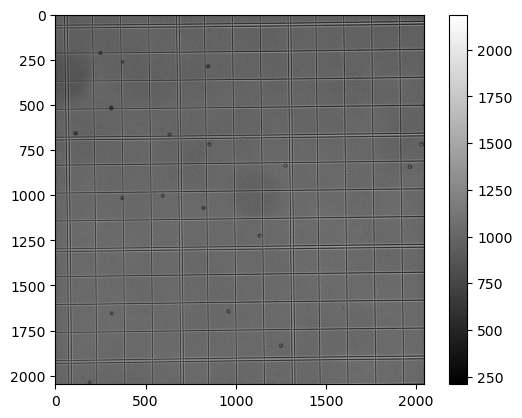

In [4]:
#open the image
with ND2Reader(file) as images:
    plt.imshow(images[0], 'gist_gray')
    plt.colorbar()
    pixel_microns = images.metadata['pixel_microns']
    
print("Pixel micron count: %s" %pixel_microns)



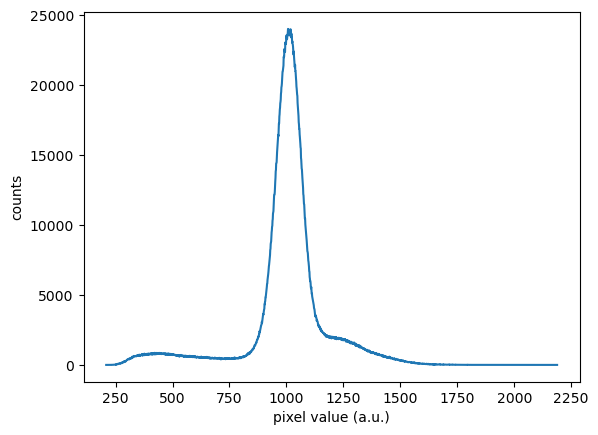

In [5]:
#finding the pixel value of the background by using a histogram
with ND2Reader(file) as images:
   # Generate the histogram of the image. `skimage.exposure.histogram` will return
    # the values of the histogram as well as the centers of the bins.
    hist, bins = skimage.exposure.histogram(images[0])

    # Plot the histogram values versus the bin centers.
    plt.plot(bins, hist)
    plt.xlabel('pixel value (a.u.)')
    plt.ylabel('counts') 
    

Threshold: 750
Number of objects found: 282
Pixel count: 8007
Cell Area: 839.9886970533614
Approved cells: 12


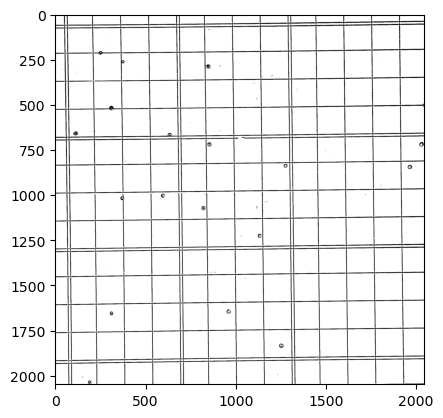

In [6]:
with ND2Reader(file) as images:    
    #set a threshold based off the histogram
    
    #thresh = np.mean(images[0])
    thresh = 750
    print("Threshold: %s" %thresh)
    #segment off the cells by taking away the background
    thresh_im  = images[0] > thresh
    
    plt.imshow(thresh_im, 'gist_gray')
    
    #np.set_printoptions(threshold=np.inf)
    #count the cells and find the cell area
    im_lab, num_obj = skimage.measure.label(thresh_im, return_num=True)
    cell_pix = np.count_nonzero(im_lab == 3)
    cell_area = cell_pix * pixel_microns**2
    print("Number of objects found: %s" %num_obj)
    print("Pixel count: %s" %cell_pix)
    print("Cell Area: %s" %cell_area)
    
    cellarea_lower = np.pi * np.square(0.5)
    cellarea_upper = np.pi * np.square(2)
    
    #find the approved cells based off the area of the cells
    approved_cells = np.zeros_like(thresh_im)
    for i in range(num_obj):
        cell = (im_lab == (i+1))
        cell_area = np.count_nonzero(cell) * pixel_microns**2
        if (cell_area > cellarea_lower) & (cell_area < cellarea_upper):
            approved_cells += cell


    #show approved cells
    approved_lab, num_obj = skimage.measure.label(approved_cells, return_num=True)
    print("Approved cells: %s" %num_obj)

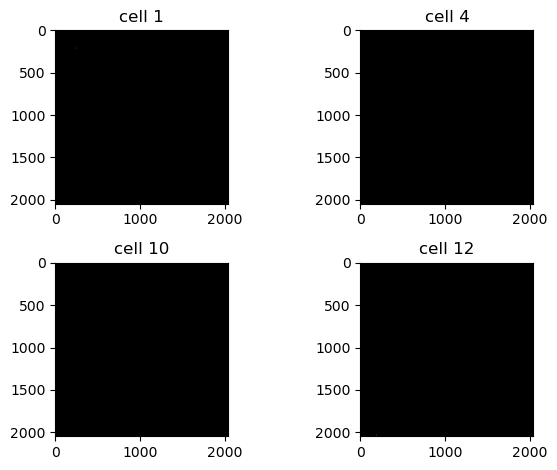

In [10]:
# Make subplots to show what the computer counted as cells
fig, ax = plt.subplots(nrows=2, ncols=2)

# Isolate bacteria 1, 4, 10, and 23.
bac_1 = approved_lab == 1
bac_4 = approved_lab == 4
bac_10 = approved_lab == 10
bac_12 = approved_lab == 12


# Show each bacterium
ax[0, 0].imshow(bac_1, cmap='gist_gray')
ax[0, 1].imshow(bac_4, cmap='gist_gray')
ax[1, 0].imshow(bac_10, cmap='gist_gray')
ax[1, 1].imshow(bac_12, cmap='gist_gray')

# Add the titles. 
ax[0, 0].set_title('cell 1')
ax[0, 1].set_title('cell 4')
ax[1, 0].set_title('cell 10')
ax[1, 1].set_title('cell 12')

# Adjust the spacing so the labels don't overlap.
plt.tight_layout()